
#### The Yelp dataset includes information from more than 1.1 million authenticated users who reviewed businesses in twelve urban areas and four countries over more than ten years. 


* The value of our research

It has long been a common notion that popular Yelp users have influence over businesses. We wanted to find out whether this notion is true, and what characteristics those users have. Although our findings are only applicable to Yelp users and the businesses on Yelp since we only used Yelp’s dataset, our research is valuable because Yelp has a huge user base: average monthly unique Yelp visitors reached 145 million by March 2016.


* First, let's connect to the database and import some packages that we need for further analysis.

In [2]:
import pymysql as myDB

db = myDB.connect(host='localhost', user='root', passwd='123456', db = 'yelp_db')
cur = db.cursor()

In [5]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

* Let us have a first look on the data.

In [14]:
sql = ' SHOW TABLES; '
cur.execute(sql)
cur.fetchall()

(('attribute',),
 ('business',),
 ('business_popular',),
 ('category',),
 ('checkin',),
 ('elite_years',),
 ('friend',),
 ('hours',),
 ('photo',),
 ('review',),
 ('tip',),
 ('user',))

In [40]:
business = pd.read_sql('SELECT * FROM business', con=db)
business.head()

,id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open
0,--6MefnULPED_I942VcFNA,John's Chinese BBQ Restaurant,,"328 Highway 7 E, Chalmers Gate 11, Unit 10",Richmond Hill,ON,L4B 3P7,43.8409,-79.3996,3.0,30,1
1,--7zmmkVg-IMGaXbuVd0SQ,Primal Brewery,,16432 Old Statesville Rd,Huntersville,NC,28078,35.4371,-80.8437,4.0,42,1
2,--8LPVSo5i0Oo61X01sV9A,Valley Bone and Joint Specialists,,"3941 E Baseline Rd, Ste 102",Gilbert,AZ,85234,33.3795,-111.7280,4.5,3,1
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,The Strip,3355 Las Vegas Blvd S,Las Vegas,NV,89109,36.1232,-115.1690,4.0,1389,1
4,--9QQLMTbFzLJ_oT-ON3Xw,Great Clips,,"1835 E Guadalupe Rd, Ste 106",Tempe,AZ,85283,33.3617,-111.9100,3.0,9,1


In [42]:
review = pd.read_sql('SELECT * FROM review', con=db)
review.head()

,id,stars,date,text,useful,funny,cool,business_id,user_id
0,----X0BIDP9tA49U3RvdSQ,4,2014-02-17,"Red, white and bleu salad was super yum and a ...",0,0,0,Ue6-WhXvI-_1xUIuapl0zQ,gVmUR8rqUFdbSeZbsg6z_w
1,---0hl58W-sjVTKi5LghGw,4,2016-07-24,Ate the momos during the momo crawl.. Was the ...,0,0,0,Ae4ABFarGMaI5lk1i98A0w,Y6qylbHq8QJmaCRSlKdIog
2,---3OXpexMp0oAg77xWfYA,5,2012-04-07,Pizza here made my night... Good people and gr...,2,0,0,lKq4Qsz13FDcAVgp49uukQ,SnXZkRN9Yf060pNTk1HMDg
3,---65iIIGzHj96QnOh89EQ,5,2015-09-11,Great brisket sandwich as claimed. Weird that ...,0,0,0,6nKR80xEGHYf2UxAe_Cu_g,VcmSgvslHAhqWoEn16wjjw
4,---7WhU-FtzSUOje87Y4uw,5,2016-01-22,"Interesting food, great atmosphere, and great ...",1,1,1,Z_mJYg3vi8cPZHa1J4BALw,NKF9v-r0jd1p0JVi9h2T1w


In [45]:
checkin = pd.read_sql('SELECT * FROM checkin', con=db)
checkin.head()

,business_id,date,count
0,7KPBkxAOEtb3QeIL9PEErg,Thursday-21:00,4
1,7KPBkxAOEtb3QeIL9PEErg,Thursday-1:00,1
2,7KPBkxAOEtb3QeIL9PEErg,Thursday-4:00,1
3,7KPBkxAOEtb3QeIL9PEErg,Thursday-2:00,1
4,7KPBkxAOEtb3QeIL9PEErg,Thursday-20:00,2


In [48]:
user = pd.read_sql('SELECT * FROM user', con=db)
user.head()

,id,name,review_count,yelping_since,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,---1lKK3aKOuomHnwAkAow,Monera,245,2007-06-04,67,22,9,15,3.97,2,3,2,1,0,5,9,9,9,9,0
1,---94vtJ_5o_nikEs6hUjg,Joe,2,2016-05-27,0,0,0,0,5.00,0,0,0,0,0,0,0,0,0,0,0
2,---cu1hq55BP9DWVXXKHZg,Jeb,57,2009-04-18,34,14,0,0,3.79,0,0,0,0,0,3,2,0,0,0,0
3,---fhiwiwBYrvqhpXgcWDQ,Jed,8,2011-04-20,2,3,1,0,2.78,0,0,0,0,0,0,0,0,0,0,0
4,---PLwSf5gKdIoVnyRHgBA,Rae,2,2015-07-31,1,0,0,0,4.00,0,0,0,0,0,0,0,0,0,0,0


* We employed a very simple definition of “popular user” as in the top 1% of users ranked according to the number of fans because we believed that the more fans, the higher popularity. 

In [7]:
popular_score = pd.read_sql('SELECT fans as score FROM user', con=db)
popular_score.quantile(.99)

score    27.0
Name: 0.99, dtype: float64

* So “popular user” are those who have more than 27 fans. 

---

## Analyze data

Firstly, we compare how many users checked in at businesses reviewed by popular users and how many users checked in at other businesses.

In [9]:
pd.read_sql(
    '''
    select avg(checkin_count)
    from 
    (select sum(checkin.count) as checkin_count
    from checkin
    where checkin.business_id in
    (select business_id from review where user_id in
    (select id from user where fans >= 27))
    group by checkin.business_id) as a
    ;
    ''', con=db)

,avg(checkin_count)
0,202.0821


In [10]:
pd.read_sql(
    '''
    select avg(checkin_count)
    from 
    (select sum(checkin.count) as checkin_count
    from checkin
    where checkin.business_id not in
    (select business_id from review where user_id in
    (select id from user where fans >= 27))
    group by checkin.business_id) as a
    ;
    ''', con=db)

,avg(checkin_count)
0,18.0776


* This result shows a strong association between the popularity of businesses (as measured by Yelp user checkins) and whether they are reviewed by popular users. 
 

---

## Then we explored the characteristics of popular users compared to all others. 


### Question 1: Do popular users write more reviews and more tips than other users?

* We compute and plot the average number of reviews and tips for all users, popular and not popular to see the difference between them.

### Reviews

In [7]:
sql = '''
    SELECT AVG(review_count) FROM user 
      '''
cur.execute(sql)
# if we run cur.fetchall(), what we get would be a tuple
# therefore, we change the typle to float so that we could plot the number
all_review_count=float(cur.fetchall()[0][0])
all_review_count

23.7269

In [8]:
sql = '''
    SELECT AVG(review_count) FROM user 
    WHERE fans>=27;   
      '''
cur.execute(sql)

popular_review_count=float(cur.fetchall()[0][0])
popular_review_count

486.7096

In [9]:
sql = '''
      SELECT AVG(review_count) FROM user 
      WHERE fans<27;   
      '''
cur.execute(sql)

nonpopular_review_count=float(cur.fetchall()[0][0])
nonpopular_review_count

18.8412

In [11]:
x=['pop','non-pop','all']
y=[popular_review_count,nonpopular_review_count,all_review_count]

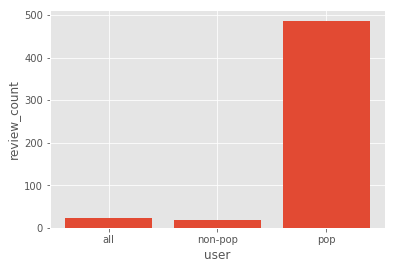

In [12]:
plt.style.use("ggplot")
plt.bar(x,y)
plt.xlabel("user")
plt.ylabel("review_count")
plt.grid(True)

### Tips

In [13]:
sql = '''
      SELECT AVG(tip_count) FROM (
      SELECT user_id, count(user_id) AS tip_count,fans AS popularity FROM tip,user 
      WHERE user_id=id 
      GROUP by user_id) as tiptip
      WHERE popularity>=27; 
      '''
cur.execute(sql)

popular_tip_count=float(cur.fetchall()[0][0])
popular_tip_count

23.4437

In [14]:
sql = '''
      SELECT AVG(tip_count) FROM (
      SELECT user_id, count(user_id) AS tip_count,fans AS popularity FROM tip,user 
      WHERE user_id=id 
      GROUP by user_id) as tiptip
      WHERE popularity<27; 
      '''
cur.execute(sql)

nonpopular_tip_count=float(cur.fetchall()[0][0])
nonpopular_tip_count

3.7475

In [15]:
sql = '''
      SELECT AVG(tip_count) FROM (
      SELECT user_id, count(user_id) AS tip_count,fans AS popularity FROM tip,user 
      WHERE user_id=id 
      GROUP by user_id) as tiptip; 
      '''
cur.execute(sql)

all_tip_count=float(cur.fetchall()[0][0])
all_tip_count

4.2055

In [16]:
x=['pop','non-pop','all']
y=[popular_tip_count,nonpopular_tip_count,all_tip_count]

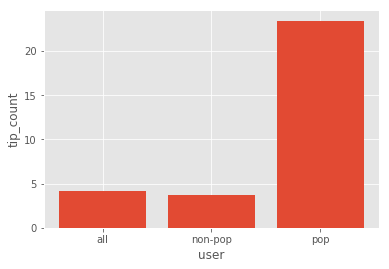

In [17]:
plt.style.use("ggplot")
plt.bar(x,y)
plt.xlabel("user")
plt.ylabel("tip_count")
plt.grid(True)

* As expected, we find that popular users have posted more than 25 times as many reviews as other users and roughly 6 times as many tips as others, on average. In other words, the popular users that we define appear to be much more active than other users in terms of posting reviews and tips. 

### Question 2:  Do popular users write longer (more detailed) reviews than other users?

* We count total words / total reviews written by popular users.

In [10]:
popular_review=pd.read_sql(
    '''
    SELECT user.id, review.text
    FROM review
    JOIN user
    ON review.user_id=user.id
    WHERE user.fans >= 27
    ''', con=db)

In [11]:
popular_wordcount = 0
popular_reviewcount = 0
for content in popular_review.text:
    popular_reviewcount += 1
    for word in content.split():
        popular_wordcount += 1
print("Average word count per review of popular users is:",popular_wordcount/popular_reviewcount)

Average word count per review of popular users is: 182.36881699184983


* We compare this to total words / total reviews by other users.

In [12]:
nonpopular_review=pd.read_sql(
    '''
    SELECT user.id, review.text
    FROM review
    JOIN user
    ON review.user_id=user.id
    WHERE user.fans < 27
    ''', con=db)

In [13]:
nonpopular_wordcount = 0
nonpopular_reviewcount = 0
for content in nonpopular_review.text:
    nonpopular_reviewcount += 1
    for word in content.split():
        nonpopular_wordcount += 1
print("Average word count per review of non popular users is:",nonpopular_wordcount/nonpopular_reviewcount)

Average word count per review of non popular users is: 108.2166561980537


* After analyzing the length of reviews, we find that the reviews posted by popular users are, on average, nearly 70% more words than reviews by others. This indicates that, the popular users may tend to go into greater detail than others when writing a review, so that their reviews might contain more useful information and are more likely to influence behaviors of other users.

### Question 3: Do popular users have more friends than other users?

* We compute and plot the average number of friends for all users, popular and not popular to see the difference.

In [17]:
sql = '''
      SELECT AVG(friend_count) FROM (
      SELECT user_id, count(user_id) AS friend_count,fans AS popularity FROM friend,user 
      WHERE user_id=id 
      GROUP by user_id) 
      AS friendf;
      '''
cur.execute(sql)
avg_friend_count=float(cur.fetchall()[0][0])
avg_friend_count

58.9965

In [18]:
sql = '''
      SELECT AVG(friend_count) FROM (
      SELECT user_id, count(user_id) AS friend_count,fans AS popularity FROM friend,user 
      WHERE user_id=id 
      GROUP by user_id) 
      AS friendf
      WHERE popularity>=27; 
      '''
cur.execute(sql)
pop_friend_count=float(cur.fetchall()[0][0])
pop_friend_count

624.6199

In [19]:
sql = '''
      SELECT AVG(friend_count) FROM (
      SELECT user_id, count(user_id) AS friend_count,fans AS popularity FROM friend,user 
      WHERE user_id=id 
      GROUP by user_id) 
      AS friendf
      WHERE popularity<27; 
      '''
cur.execute(sql)

nonpop_friend_count=float(cur.fetchall()[0][0])
nonpop_friend_count

48.6212

In [20]:
x=['pop','non-pop','all']
y=[pop_friend_count,nonpop_friend_count,avg_friend_count]

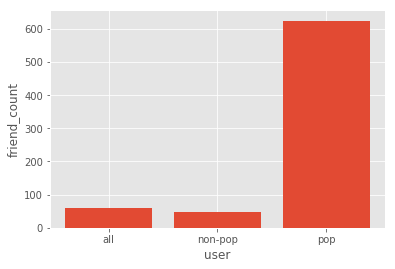

In [21]:
plt.style.use("ggplot")
plt.bar(x,y)
plt.xlabel("user")
plt.ylabel("friend_count")
plt.grid(True)

* The results show that popular users have about 625 friends on average, which is almost 13 times of the number of other users. With a larger number of friends, popular users might have a relatively stable social circle on yelp, which could make their activities such as checking in a restaurant and posting a review easily exposed to more other yelp users.

### Question 4: Are reviews by popular users more effective or influential than those by others?
* Here we operationalize effectiveness or influence by the number of 'Useful', 'Cool', 'Funny' or 'Fan' tags received per review. These influence scores are reported for popular and other users for comparison.

In [5]:
popular_influence=pd.read_sql(
    '''
    select sum(useful)/sum(review_count) as useful_gain_per_review, 
    sum(cool)/sum(review_count) as cool_gain_per_review,
    sum(funny)/sum(review_count) as funny_gain_per_review
    from user 
    where fans>= 27;
    ''', con=db)
popular_influence

,useful_gain_per_review,cool_gain_per_review,funny_gain_per_review
0,3.8067,3.2228,2.2481


In [6]:
nonpopular_influence=pd.read_sql(
    '''
    select sum(useful)/sum(review_count) as useful_gain_per_review, 
    sum(cool)/sum(review_count) as cool_gain_per_review,
    sum(funny)/sum(review_count) as funny_gain_per_review
    from user 
    where fans < 27;
    ''', con=db)
nonpopular_influence

,useful_gain_per_review,cool_gain_per_review,funny_gain_per_review
0,0.5872,0.2115,0.2055


In [7]:
# we combine two data frames, so that we can plot them.
result = pd.concat([popular_influence,nonpopular_influence])
result

,useful_gain_per_review,cool_gain_per_review,funny_gain_per_review
0,3.8067,3.2228,2.2481
0,0.5872,0.2115,0.2055


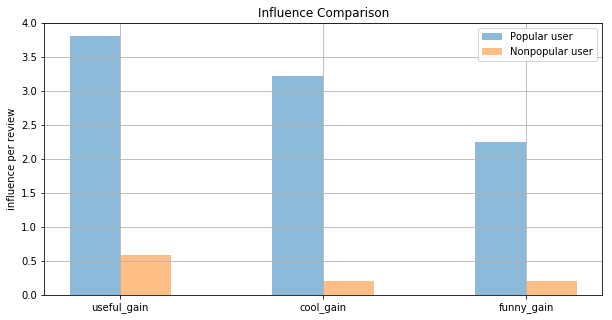

In [8]:
pos = list(range(len(result.iloc[0,]))) 
width = 0.25 
# Plot the bars
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(pos, 
        result.iloc[0,], 
        width, 
        alpha=0.5)

plt.bar([p + width for p in pos] ,
        result.iloc[1,],
        width, 
        alpha=0.5) 

# Set the labels and tile
ax.set_ylabel('influence per review')
ax.set_xticklabels(['useful_gain','cool_gain','funny_gain','fans_gain'])
ax.set_title('Influence Comparison')

# Set the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in pos ])


# Setting the limits for x-axis and y-axis
plt.xlim(min(pos)-width, max(pos)+width*2)
plt.ylim([0, 4])

plt.legend(['Popular user', 'Nonpopular user'], loc='upper right')
plt.grid()
plt.show()

* In terms of tags received per review published, the popular users are much more effective than other users receiving 6 times as many ‘useful’ tags, 15 times as many ‘cool’ tags and 11 times as many ‘funny’ tags as other reviewers. This indicates that, the reviews posted by popular users are in much higher quality and are more convincing, so that these reviews might be more likely to have real effect on others.

### Question 5: Are popular users more likely to be selected by Yelp as elite users?

* We compute and plot the average number of years that Yelp awarded elite status to all users, popular and not popular.

In [4]:
sql = '''
      SELECT AVG(year_count) FROM (
      SELECT user_id,count(user_id) AS year_count,fans AS popularity FROM elite_years,user 
      WHERE user_id=id 
      GROUP BY user_id) AS yy;
      '''
cur.execute(sql)

avg_year_count=float(cur.fetchall()[0][0])
avg_year_count

3.2174

In [5]:
sql = '''
      SELECT AVG(year_count) FROM (
      SELECT user_id,count(user_id) AS year_count,fans AS popularity FROM elite_years,user 
      WHERE user_id=id 
      GROUP BY user_id) AS yy
      WHERE popularity>=27;
      '''
cur.execute(sql)

pop_year_count=float(cur.fetchall()[0][0])
pop_year_count

5.2561

In [6]:
sql = '''
      SELECT AVG(year_count) FROM (
      SELECT user_id,count(user_id) AS year_count,fans AS popularity FROM elite_years,user 
      WHERE user_id=id 
      GROUP BY user_id) AS yy
      WHERE popularity<27;
      '''
cur.execute(sql)

nonpop_year_count=float(cur.fetchall()[0][0])
nonpop_year_count

2.717

In [7]:
x=['pop','non-pop','all']
y=[pop_year_count,nonpop_year_count,avg_year_count]

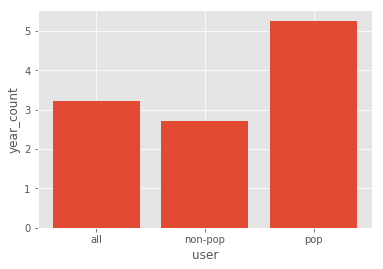

In [8]:
plt.style.use("ggplot")
plt.bar(x,y)
plt.xlabel("user")
plt.ylabel("year_count")
plt.grid(True)

* From the result above, our popular users are twice as likely to be selected by Yelp as elite users as all the others. On average, our popular users were selected to be elite for 5.2561 years while the others were on average selected for 2.717 years. This indicates that Yelp did a good job in recognizing those users who attracted other users by writing popular reviews. However, after researching Yelp’s elite rewarding system, we believed that Yelp may loosen its criteria of rewarding users. In the current rewarding system, only after being elite for more than 5 years can a user gain a Gold Elite Badge; for a Black Elite Badge a user has to be an elite for more than 10 years. As shown by our research, our popular users had on average been elites for about 5 years, which means most of them were either normal elites or gold badge holders. Given that those popular users were in the top 1 percentile of all the users, Yelp’s elite reward system has an excessively strict upgrading rule.

---

## conclusion

* In general, Yelp did a good job in recognizing those popular users. However, we didn’t find out whether all the popular users were selected to be elites to find out whether all the major contributors were recognized by elite rewarding system. We could have evaluated the elite system more holistically if we had fuller access to Yelp data.

* In sum, even with a very simple measure of popularity, the ‘popular’ users in the Yelp dataset appear to be much more influential than others. It may be that they are better writers or that they have simply been on the platform longer than others. But the end result is the same: a small set of users appear to be setting the tone on this crowd-based platform.